# COMP3314 Assignment4-Q3: K-means Clustering (40 Points)


In this task, we'll utilize the k-means algorithm to compress image colors. Consider an image containing millions of colors. Typically, many of these colors remain unused, with numerous pixels sharing similar or identical colors.


Your tasks:

1. Utilize Scikit-Learn's implementation to perform color compression.
2. Independently implement the k-means algorithm.
3. Investigate the impact of initial point selection on the results.

## Step 1: Image processing (code given)
Display the example image and transform it into a set of data points.

In [2]:
"""
You'll need to install necessary packages, e.g.
- numpy
- matplotlib
- pillow
- scikit-learn
- and etc.
"""

import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

Image's shape     : (360, 480, 3)
Image's data type : float32
Image's data range: [0. 0. 0.] ~ [1. 1. 1.]


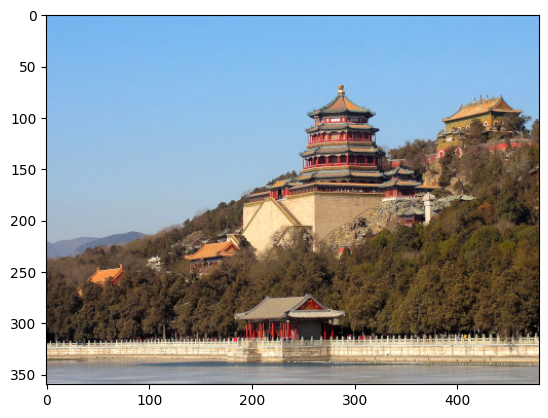

In [3]:
def load_image_from_url(url):
    """
    Load an image from a URL and return it as a floating-point numpy array.

    Args:
        url (str): The URL of the image.

    Returns:
        np.ndarray: Floating-point array representation of the image, or None if an error occurred.
    """
    try:
        response = requests.get(url)
        if response.status_code == 200:
            im = Image.open(BytesIO(response.content))
            if im.mode != "RGB":
                im = im.convert("RGB")
            im_array = np.asarray(im).astype("float32") / 255.0
            return im_array
        else:
            print(f"Failed to retrieve the image: Status code {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


im = load_image_from_url(
    "https://github.com/comp3314/hw-data/releases/download/hw3/summer_palace.jpg"
)
print(f"Image's shape     : {im.shape}")
print(f"Image's data type : {im.dtype}")
print(f"Image's data range: {np.min(im, axis=(0,1))} ~ {np.max(im, axis=(0,1))}")

plt.imshow(im)
plt.show()

Reshape the image as a collection of points within a three-dimensional color space. We'll reshape it into `(n_samples, n_features)`, where `n_samples` is the number of pixels in the image and `n_features` is 3, representing the RGB values of each pixel.

In [4]:
data = im.reshape(-1, 3)
print(data.shape)

(172800, 3)


## Step 2: Implement K-means with random initialization (10 points)

You're given the following framework code for the K-means algorithm. You'll need to implement:

- `_initialize_centers_random()`: Initialize the cluster centers randomly (5 points).
- `fit()`: Fit the data to the model (5 points).

In [5]:
import numpy as np


class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, initialization="random"):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.initialization = initialization

        if self.initialization not in ["random", "fps"]:
            raise ValueError("Invalid initialization method.")

    def _initialize_centers_random(self, X):
        """
        Initialize the cluster centers by randomly selecting `n_clusters` samples.
        """
        # === Your code here ===
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.cluster_centers_ = X[random_indices]
        # ======================

    def _initialize_centers_fps(self, X):
        """
        Initialize the cluster centers by using the Farthest Point Sampling
        (FPS) algorithm.

        - It starts from a randomly selected sample as the first center.
        - Then in each iteration, it selects the sample that is the farthest
          from the set of selected centers.
        """
        # === Your code here ===
        centers = [X[np.random.choice(X.shape[0])]]
        # ======================

    def fit(self, X):
        if self.initialization == "random":
            self._initialize_centers_random(X)
        elif self.initialization == "fps":
            self._initialize_centers_fps(X)
        else:
            raise ValueError("Invalid initialization method.")

        # === Your code here ===
        for _ in range(self.max_iter):
            # 1. Assign each point to the nearest cluster center
            distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
            labels = np.argmin(distances, axis=1)

            # 2. Recompute the centers as the mean of the assigned points
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            
            # 3. Check for convergence (if centers do not change)
            if np.all(new_centers == self.cluster_centers_):
                break

            self.cluster_centers_ = new_centers
        # ======================

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
        return np.argmin(distances, axis=1)

Now, let's run your code and visualize the compression results.

Text(0.5, 1.0, 'Compressed Image (Random Init)')

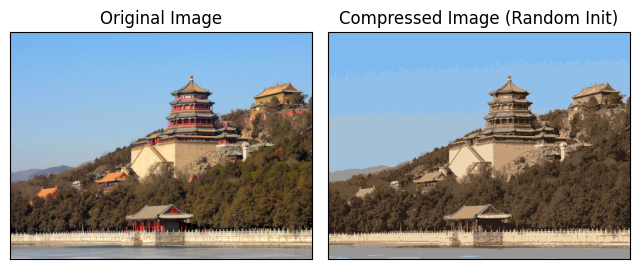

In [6]:
"""
Do not change code in this cell.
"""

kmeans = KMeans(n_clusters=10, max_iter=300, initialization="random")
kmeans.fit(data)
im_compressed = kmeans.cluster_centers_[kmeans.predict(data)].reshape(im.shape)
fig, ax = plt.subplots(1, 2, figsize=(8, 4), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(im)
ax[0].set_title("Original Image")
ax[1].imshow(im_compressed)
ax[1].set_title("Compressed Image (Random Init)")

## Step 3: Initialization by furthest point sampling (10 points)

Next, implement the `_initialize_centers_fps()` method to initialize the cluster centers by the FPS algorithm. It starts from a randomly selected sample as the first center. Then in each iteration, it selects the sample that is the farthest from the set of selected centers. We'll the visualize the results.

In [7]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, initialization="random"):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.initialization = initialization

        if self.initialization not in ["random", "fps"]:
            raise ValueError("Invalid initialization method.")

    def _initialize_centers_random(self, X):
        """
        Initialize the cluster centers by randomly selecting `n_clusters` samples.
        """
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.cluster_centers_ = X[random_indices]

    def _initialize_centers_fps(self, X):
        """
        Initialize the cluster centers by using the Farthest Point Sampling (FPS) algorithm.
        """
        # Step 1: Choose the first center randomly
        centers = [X[np.random.choice(X.shape[0])]]
        
        # Step 2: Select remaining centers
        for _ in range(1, self.n_clusters):
            # Calculate the distances to the nearest center for each point
            dist = np.min(np.linalg.norm(X[:, np.newaxis] - np.array(centers), axis=2), axis=1)
            # Step 3: Select the point that is the farthest from the existing centers
            next_center = X[np.argmax(dist)]
            centers.append(next_center)

        self.cluster_centers_ = np.array(centers)

    def fit(self, X):
        """
        Fit the K-means model to the data `X`.
        """
        if self.initialization == "random":
            self._initialize_centers_random(X)
        elif self.initialization == "fps":
            self._initialize_centers_fps(X)

        for _ in range(self.max_iter):
            # 1. Assign each point to the nearest cluster center
            distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
            labels = np.argmin(distances, axis=1)

            # 2. Recompute the cluster centers based on the mean of the assigned points
            for i in range(self.n_clusters):
                self.cluster_centers_[i] = X[labels == i].mean(axis=0)

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
        return np.argmin(distances, axis=1)


Text(0.5, 1.0, 'Compressed Image (FPS Init)')

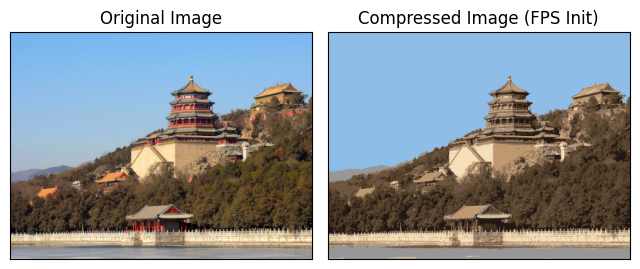

In [8]:
"""
Do not change code in this cell.
"""

kmeans = KMeans(n_clusters=10, max_iter=300, initialization="fps")
kmeans.fit(data)
im_compressed = kmeans.cluster_centers_[kmeans.predict(data)].reshape(im.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 4), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(im)
ax[0].set_title("Original Image")
ax[1].imshow(im_compressed)
ax[1].set_title("Compressed Image (FPS Init)")

## Step 4: Evaluate the compression qualitatively (10 points)

Plot and compare the results of the random and FPS initialization methods, by setting the number of clusters to 4, 8, and 16 for both methods.

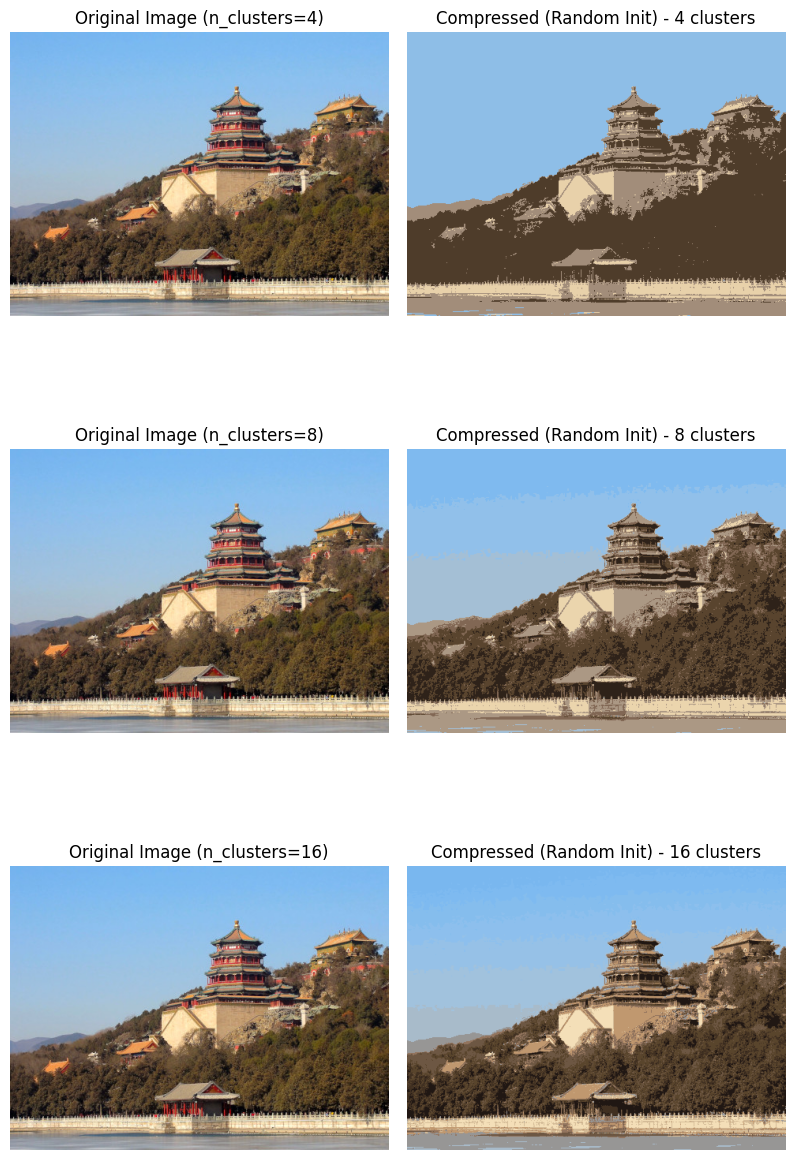

In [9]:
# === Your code here ===
import matplotlib.pyplot as plt

# Define cluster sizes to test
cluster_sizes = [4, 8, 16]

# Initialize the figure with subplots
fig, axes = plt.subplots(len(cluster_sizes), 2, figsize=(10, 5 * len(cluster_sizes)))

# Loop through each cluster size and initialization method (Random and FPS)
for idx, n_clusters in enumerate(cluster_sizes):
    # Random Initialization
    kmeans_random = KMeans(n_clusters=n_clusters, max_iter=300, initialization="random")
    kmeans_random.fit(data)
    im_compressed_random = kmeans_random.cluster_centers_[kmeans_random.predict(data)].reshape(im.shape)
    
    # FPS Initialization
    kmeans_fps = KMeans(n_clusters=n_clusters, max_iter=300, initialization="fps")
    kmeans_fps.fit(data)
    im_compressed_fps = kmeans_fps.cluster_centers_[kmeans_fps.predict(data)].reshape(im.shape)

    # Plot for Random Initialization
    axes[idx, 0].imshow(im)
    axes[idx, 0].set_title(f"Original Image (n_clusters={n_clusters})")
    axes[idx, 0].axis('off')  # Hide axes

    axes[idx, 1].imshow(im_compressed_random)
    axes[idx, 1].set_title(f"Compressed (Random Init) - {n_clusters} clusters")
    axes[idx, 1].axis('off')  # Hide axes

# Adjust layout
fig.subplots_adjust(wspace=0.05, hspace=0.3)
plt.show()
# ======================

## Step 5: Evaluate the compression quantitatively (10 points)

One way of evaluating compression quality is by computing the mean squared error (MSE) between the original image and the compressed image. The MSE is defined as the average of the squared differences between the original and compressed images.

You're required to:

1. Impelment a `mean_squared_error()` method to calculate the mean squared error.
2. Compare the MSE for the random and FPS initialization methods, by setting the number of clusters to 4, 8, and 16 for both methods.

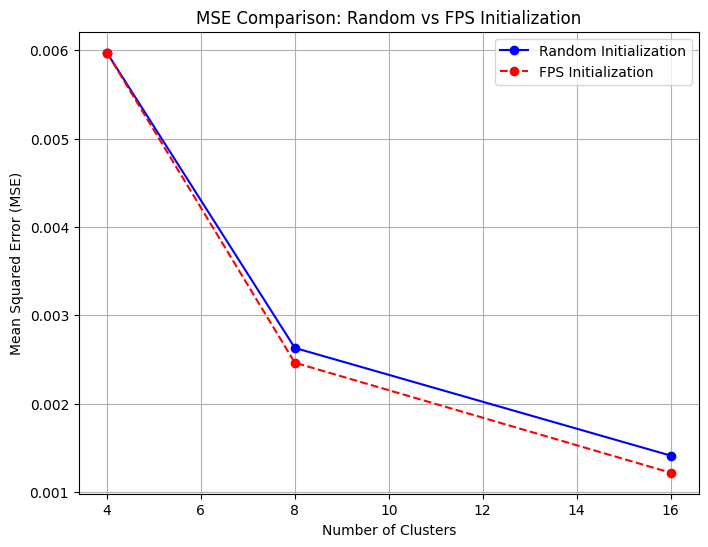

In [12]:
# === Your code here ===
def mean_squared_error(original, compressed):
    """
    Compute the Mean Squared Error between the original and compressed images.
    
    Args:
    original (np.ndarray): The original image.
    compressed (np.ndarray): The compressed image.
    
    Returns:
    float: The MSE value.
    """
    original = original.astype(np.float32)  # Convert to float for accurate calculation
    compressed = compressed.astype(np.float32)  # Convert to float for accurate calculation
    
    return np.mean((original - compressed) ** 2)

# Store MSE values for both initializations
mse_random = []
mse_fps = []

# Loop through each cluster size
for n_clusters in cluster_sizes:
    # Random Initialization
    kmeans_random = KMeans(n_clusters=n_clusters, max_iter=300, initialization="random")
    kmeans_random.fit(data)
    im_compressed_random = kmeans_random.cluster_centers_[kmeans_random.predict(data)].reshape(im.shape)
    mse_random.append(mean_squared_error(im, im_compressed_random))
    
    # FPS Initialization
    kmeans_fps = KMeans(n_clusters=n_clusters, max_iter=300, initialization="fps")
    kmeans_fps.fit(data)
    im_compressed_fps = kmeans_fps.cluster_centers_[kmeans_fps.predict(data)].reshape(im.shape)
    mse_fps.append(mean_squared_error(im, im_compressed_fps))

# Plot the results to compare MSE
fig, ax = plt.subplots(figsize=(8, 6))

# Plot MSE for both Random and FPS initializations
ax.plot(cluster_sizes, mse_random, label="Random Initialization", marker='o', linestyle='-', color='blue')
ax.plot(cluster_sizes, mse_fps, label="FPS Initialization", marker='o', linestyle='--', color='red')

# Labeling the plot
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('MSE Comparison: Random vs FPS Initialization')
ax.legend()

# Show the plot
plt.grid(True)
plt.show()
# ======================

- **Random Initialization**: This method has higher MSE values.
- **FPS Initialization**: The MSE is generally lower, as the FPS method tends to select better, more representative centers, leading to better compression results.